Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 64)         

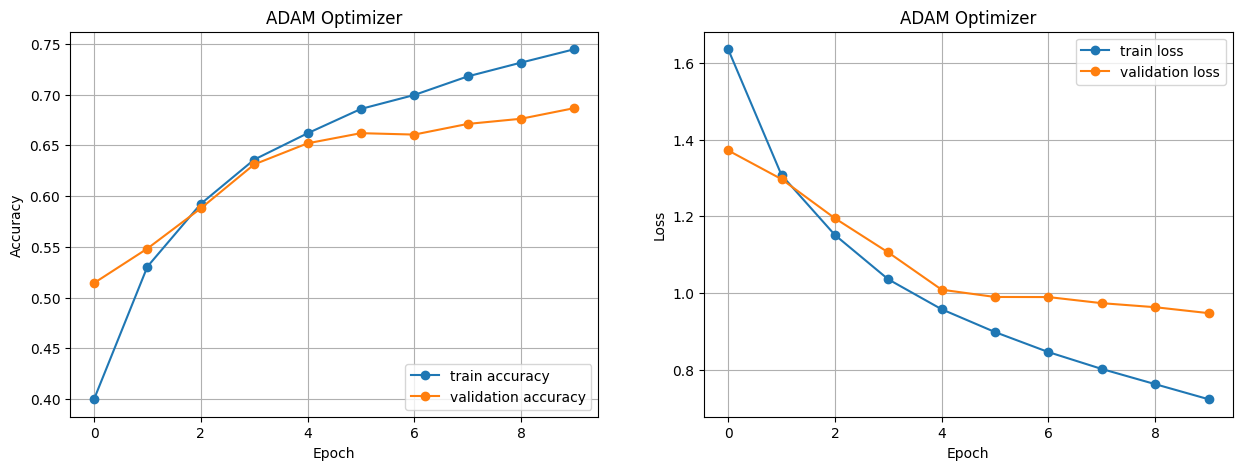


Test Accuracy (ADAM): 0.6794000267982483
Test Loss (ADAM): 0.9568438529968262



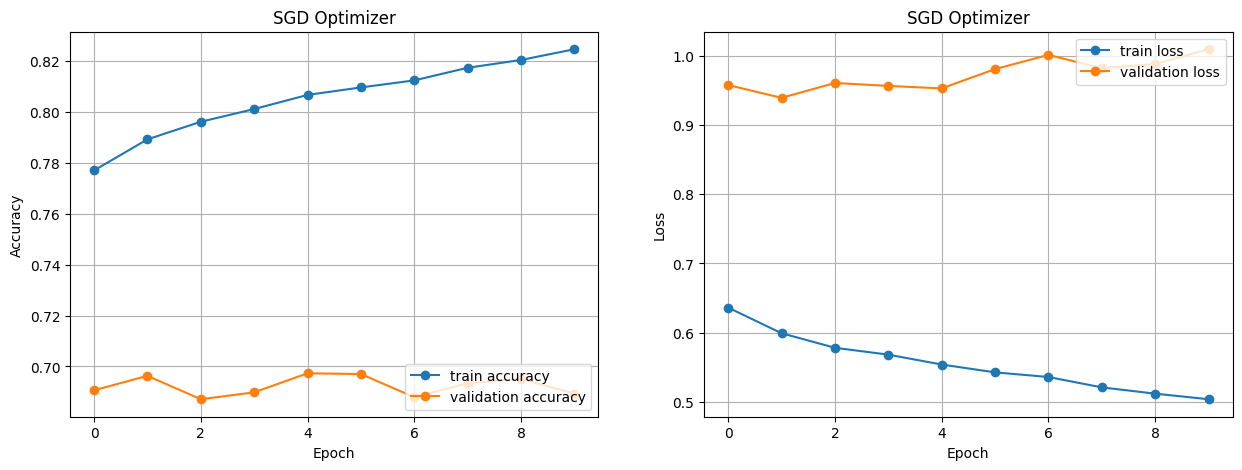


Test Accuracy (SGD): 0.6883999705314636
Test Loss (SGD): 1.007972240447998



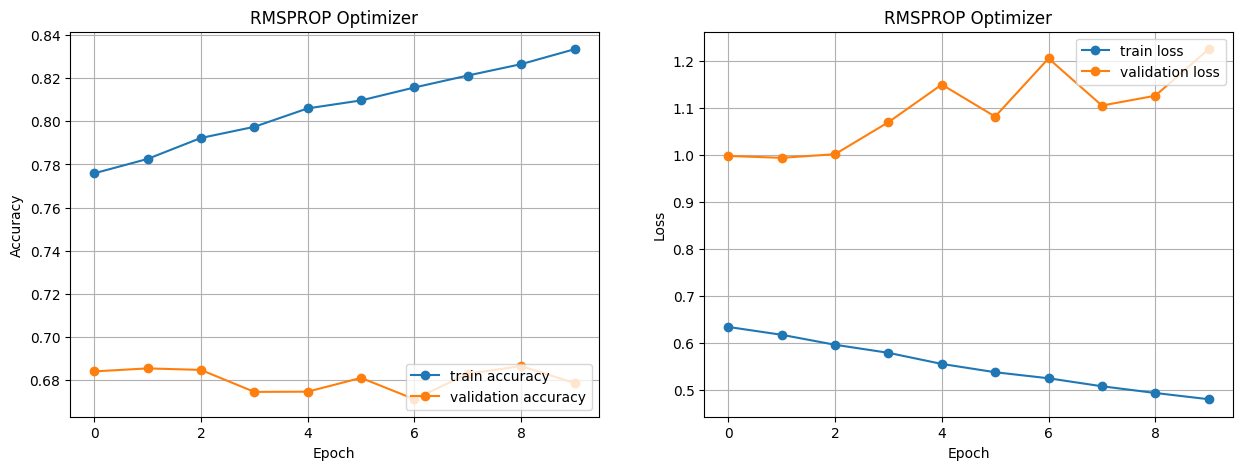


Test Accuracy (RMSPROP): 0.6690999865531921
Test Loss (RMSPROP): 1.2339619398117065



In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import os
import numpy as np
import matplotlib.pyplot as plt

# Ignore information messages from TensorFlow, but receive error messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the target labels
Y_train_encoded = to_categorical(Y_train, num_classes=10)
Y_test_encoded = to_categorical(Y_test, num_classes=10)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the CNN model
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

# List of optimizers to compare
optimizers = ['adam', 'sgd', 'rmsprop']

# Loop through each optimizer
for optimizer in optimizers:
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_train_encoded, epochs=10, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, Y_test_encoded, verbose=0)

    # Plot training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
    plt.plot(history.history['val_accuracy'], 'o-', label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.title(f'{optimizer.upper()} Optimizer')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'o-', label='train loss')
    plt.plot(history.history['val_loss'], 'o-', label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.title(f'{optimizer.upper()} Optimizer')

    plt.show()

    # Print test accuracy and loss
    print(f'\nTest Accuracy ({optimizer.upper()}): {test_acc}')
    print(f'Test Loss ({optimizer.upper()}): {test_loss}\n')
